# Wavefront Error Optimization

In [1]:
import numpy as np
from optiland import optic, optimization

Define a starting lens:

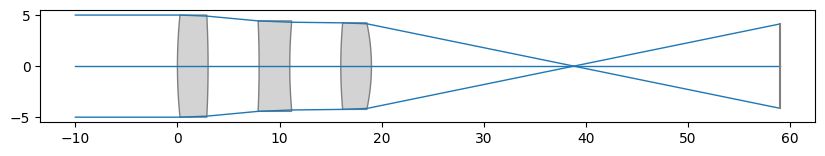

In [2]:
lens = optic.Optic()

# add surfaces
lens.add_surface(index=0, radius=np.inf, thickness=np.inf)
lens.add_surface(index=1, radius=50, thickness=3, material='SK16')
lens.add_surface(index=2, radius=-100, thickness=5)
lens.add_surface(index=3, radius=-100, thickness=3, material=('F2', 'schott'))
lens.add_surface(index=4, radius=50, thickness=5, is_stop=True)
lens.add_surface(index=5, radius=50, thickness=3, material='SK16')
lens.add_surface(index=6, radius=-20, thickness=40)
lens.add_surface(index=7)

# set aperture
lens.set_aperture(aperture_type='EPD', value=10)

# set fields
lens.set_field_type(field_type='angle')
lens.add_field(y=0)

# set wavelengths
lens.add_wavelength(value=0.48)
lens.add_wavelength(value=0.55, is_primary=True)
lens.add_wavelength(value=0.65)

lens.draw()

Define optimization problem:

In [3]:
problem = optimization.OptimizationProblem()

Add operands (targets for optimization):

In [4]:
"""
Add a wavefront error operand for all wavelengths.

Use Gaussian quadrature distribution for the rays (see distribution documentation for more information).
"""

for wave in lens.wavelengths.get_wavelengths():
    input_data = {'optic': lens, 'Hx':0, 'Hy': 0, 'num_rays': 3, 'wavelength': wave, 'distribution': 'gaussian_quad'}
    problem.add_operand(operand_type='OPD_difference', target=0, weight=1, input_data=input_data)

Define variables - let all radii vary (surface indices 1 through 6)

In [5]:
for surface_number in range(1, 7):
    problem.add_variable(lens, 'radius', surface_number=surface_number)

Check initial merit function value and system properties:

In [6]:
problem.info()

+----+------------------------+-------------------+
|    |   Merit Function Value |   Improvement (%) |
|----+------------------------+-------------------|
|  0 |                  24631 |                 0 |
+----+------------------------+-------------------+
+----+----------------+----------+----------+----------+----------+--------------------+
|    | Operand Type   |   Target |   Weight |    Value |    Delta |   Contribution (%) |
|----+----------------+----------+----------+----------+----------+--------------------|
|  0 | OPD difference |        0 |        1 | 104.534  | 104.534  |            44.3647 |
|  1 | OPD difference |        0 |        1 |  89.8916 |  89.8916 |            32.8063 |
|  2 | OPD difference |        0 |        1 |  74.9868 |  74.9868 |            22.8291 |
+----+----------------+----------+----------+----------+----------+--------------------+
+----+-----------------+-----------+---------+--------------+--------------+
|    | Variable Type   |   Surface |   V

Define optimizer:

In [7]:
optimizer = optimization.OptimizerGeneric(problem)

Run optimization:

In [8]:
optimizer.optimize()

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 0.4929267697216927
        x: [-5.850e-01 -1.977e+00 -2.011e+00 -4.529e-01 -4.369e-01
            -2.186e+00]
      nit: 9
      jac: [ 1.326e-01  9.691e-02 -2.440e-01  4.657e-01  9.640e-02
             4.481e-02]
     nfev: 70
     njev: 10
 hess_inv: <6x6 LbfgsInvHessProduct with dtype=float64>

Print merit function value and system properties after optimization:

In [9]:
problem.info()

+----+------------------------+-------------------+
|    |   Merit Function Value |   Improvement (%) |
|----+------------------------+-------------------|
|  0 |               0.492927 |            99.998 |
+----+------------------------+-------------------+
+----+----------------+----------+----------+----------+----------+--------------------+
|    | Operand Type   |   Target |   Weight |    Value |    Delta |   Contribution (%) |
|----+----------------+----------+----------+----------+----------+--------------------|
|  0 | OPD difference |        0 |        1 | 0.485152 | 0.485152 |           47.7499  |
|  1 | OPD difference |        0 |        1 | 0.155018 | 0.155018 |            4.87508 |
|  2 | OPD difference |        0 |        1 | 0.483243 | 0.483243 |           47.375   |
+----+----------------+----------+----------+----------+----------+--------------------+
+----+-----------------+-----------+-----------+--------------+--------------+
|    | Variable Type   |   Surface |  

Draw final lens:

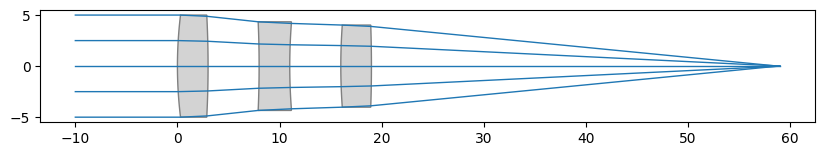

In [10]:
lens.draw(num_rays=5)